# The Sparks Foundation - Grip
## Data Science and Business Analytics Intern
## Author : Owais Ali
## Task 1: Predict the Percentage Score of students based on the No. of Hours they studied using "Supervised Machine Learning" 
#### In this task we have to predict the percentage score of Students based on the No. of Hours they studied. The task has two variables (No. of hours studied) and the (percentage score). This task can be done using simple linear regression as we have just two variables.

### Dataset Link : https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv

#### Step: 01 "Importing required Libraries"

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

#### Step: 02 "Fetching data from URL and converting it into DataFrame"

In [78]:
url = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
df = pd.read_csv(url)

#### Step: 03 "Exploring the Dataset"

In [79]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
df.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


#### Step: 04 "Describing the Dataset"

In [6]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


#### Step: 05 "Insights of the Data"

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


#### Step : 05 "Total Columns and Rows in our Dataset"

In [8]:
df.shape

(25, 2)

#### Step : 06 "Plotting the Dataset"

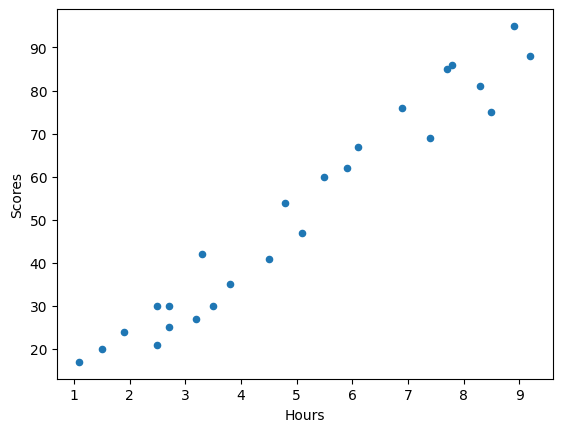

In [9]:
df.plot(kind="scatter", x="Hours", y= "Scores")
plt.show()

#### Step : 07 "Correlating the Dataset"

In [11]:
df.corr(method="pearson")

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


#### Step : 07 "Plotting the Variables seperately to check the normality"

In [12]:
hours = df["Hours"]
scores = df["Scores"]

C:\Users\Owais\AppData\Local\Temp\ipykernel_816\659109907.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(hours)


<AxesSubplot: xlabel='Hours', ylabel='Density'>

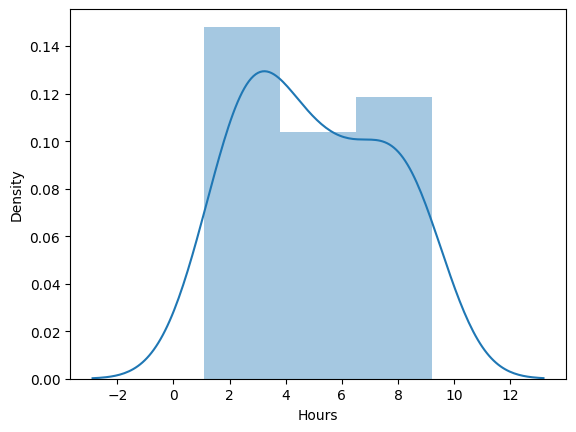

In [16]:
sns.distplot(hours)

C:\Users\Owais\AppData\Local\Temp\ipykernel_816\3286470618.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(scores)


<AxesSubplot: xlabel='Scores', ylabel='Density'>

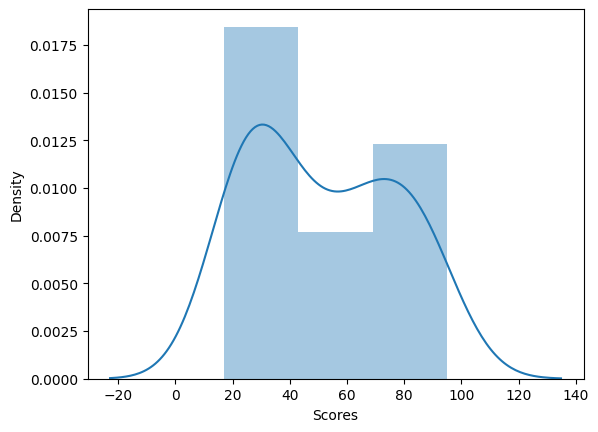

In [19]:
sns.distplot(scores)

# **"Linear Regression"**

#### Developing Linear regression model

In [34]:
reg = LinearRegression()
reg

LinearRegression()

In [45]:
X = df[["Hours"]]
y = df[["Scores"]]

#### Splitting data into training and testing sets

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
print("Number of test samples used: ", X_test.shape[0])
print("Number of training samples used: ", X_train.shape[0])

Number of test samples used:  5
Number of training samples used:  20


In [60]:
len(X_train),len(X_test), len(y_train), len(y_test)

(20, 5, 20, 5)

In [47]:
reg.fit(X_train, y_train)

LinearRegression()

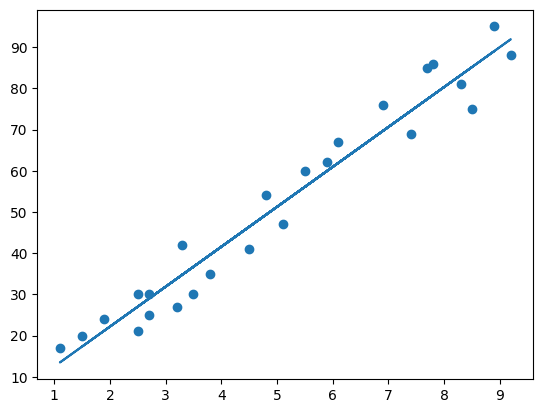

In [61]:
m = reg.coef_
c = reg.intercept_
line = m*X+c

# Trained model Plotting
plt.scatter(X,y)
plt.plot(X,line)
plt.show()

### Storing predicted values

In [62]:
y_pred = reg.predict(X_test)
y_pred

array([[83.18814104],
       [27.03208774],
       [27.03208774],
       [69.63323162],
       [59.95115347]])

In [85]:
actual_predict = pd.DataFrame(np.c_[X_test, y_test, y_pred], columns=["Hours", "Actual Marks","Predicted Marks"])
actual_predict

,Hours,Actual Marks,Predicted Marks
0,8.3,81.0,83.188141
1,2.5,30.0,27.032088
2,2.5,21.0,27.032088
3,6.9,76.0,69.633232
4,5.9,62.0,59.951153


C:\Users\Owais\AppData\Local\Temp\ipykernel_816\2470731121.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.array(y_test - y_pred))


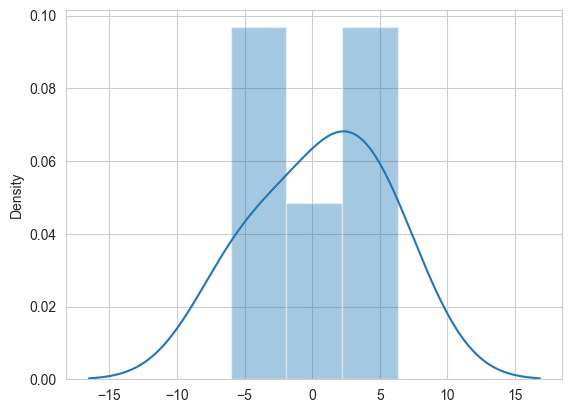

In [86]:
# Plotting a Distplot to see the difference between Actual values and Predicted values
sns.set_style("whitegrid")
sns.distplot(np.array(y_test - y_pred))
plt.show()

# Checking the efficiency of the Model

What would be the predicted Score of a student who studies for 9.2 Hours/day ?

In [95]:
h = 9.2
s = reg.predict([[h]])
print(f"If a Student Studies for {h} hours a day He/She will score {s}% in Exam.")

If a Student Studies for 9.2 hours a day He/She will score [[91.90201137]]% in Exam.


c:\Users\Owais\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


## Model Evaluation

In [96]:
#Importing Libraries
from sklearn import metrics
from sklearn.metrics import r2_score

# Evaluating the model
# Calculating the Mean Absolute Error
print("Mean Absolute Error: ", metrics.mean_absolute_error(y_test, y_pred) )

# Calculating the R^2 Score
print("R^2 Score", r2_score(y_test, y_pred))


Mean Absolute Error:  3.9207511902099244
R^2 Score 0.9678055545167994


### Conclusion :

The model gives an R2 value of 95+ and the Mean Absolute Error of 3.92 which means our model is working Very Well Enough!